**Importing All the required libraries for the assignment**


*   Pandas -> For handling datasets (loading, cleaning, preprocessing, CSV/Excel reading)
*   numpy → For numerical operations (arrays, math functions, matrix calculations).
*   matplotlib → For creating visualizations like plots and graphs.
*   seaborn → For statistical visualizations (heatmaps, pairplots, etc.) — built on matplotlib.
*   scikit-learn → For preprocessing (scaling, splitting data) and machine learning models.
*   tensorflow → For building, training, and evaluating Neural Networks.
*   Kagglehub is a is a python package that allows you to load dataset directly from the Kaggle.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import kagglehub
from kagglehub import KaggleDatasetAdapter

Making some initial adjectments For the better output.

In [ ]:
# Show all columns without wrapping
pd.set_option('display.expand_frame_repr', False)

**Importing the data set directly from Kaggle**

In [ ]:
# Specify the CSV file inside the dataset
file_path = "diabetes.csv"

# Load the dataset into a Pandas DataFrame
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "uciml/pima-indians-diabetes-database",
    file_path,
)

# Display first 5 rows
print("\n\nFirst 5 records:")
print(df.head())


Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.


First 5 records:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1


**Data Exploration and Preprocessing**

In [ ]:
# Dataset info
print(f"Shape of the data set : {df.shape}\n")
print("The information ..... displaying columns names, data types , missing values and memory consumptions.")
print(df.info())
print("\nUnderstnd the data values or entries....")
print(df.describe())

print("\nNumber of zeros in each column...")

# printing columns with zeros
col_list = df.columns.tolist()
for col in col_list:
  zero_count = (df[col] == 0 ).sum()
  print(f"\t{col} has {zero_count} zeor values.")

# replacing zeros with median
for col in col_list:
  df[col] = df[col].replace(0, df[col].median())


Shape of the data set : (768, 9)

The information ..... displaying columns names, data types , missing values and memory consumptions.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB
None

Understnd the data values or entries....
       Pregnancies     Glucose  BloodPressure  SkinThickne

**Data Visualizing**


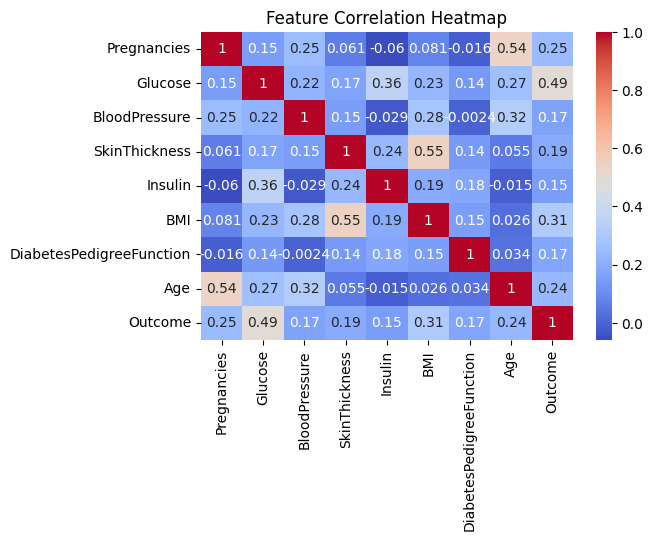

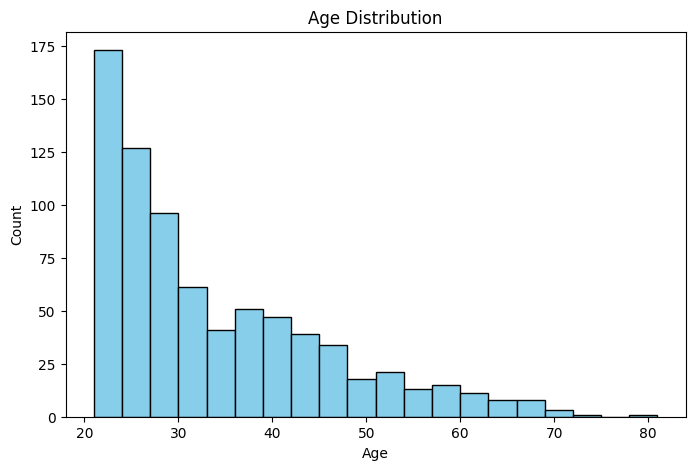

In [ ]:
# Visualization - Correlation heatmap
print("\n\n")
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

print("")
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Now spliting the features and targets also scalling the both to overcome range difference between features.

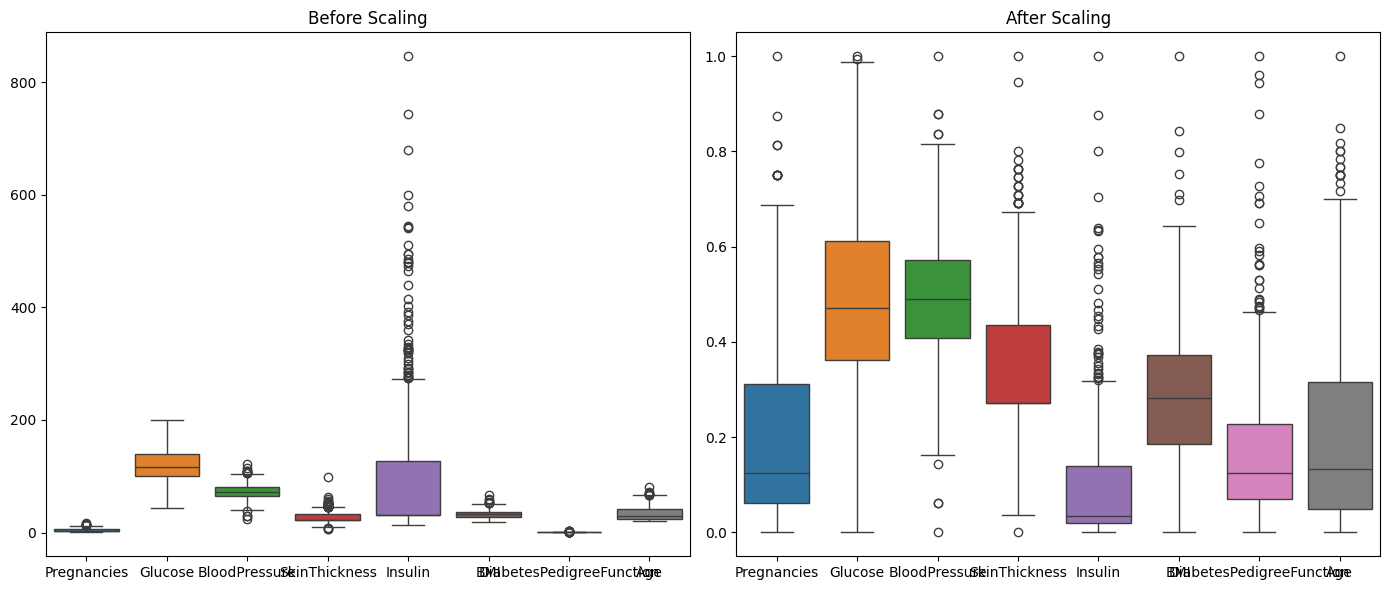

In [ ]:
# Split features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaled_df = pd.DataFrame(X_train, columns=df.drop("Outcome", axis=1).columns)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(data=df.drop("Outcome", axis=1))
plt.title("Before Scaling")

plt.subplot(1,2,2)
sns.boxplot(data=scaled_df)
plt.title("After Scaling")

plt.tight_layout()
plt.show()

**Building the Neural Network Model**

In [ ]:
# Define model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu',
          kernel_regularizer=l2(1e-4)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

# Compile
opt = Adam(learning_rate=0.00035)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


# Model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Training the model & visualization


*   Precision:
  Formula:

Precision
*   List item



Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5296 - loss: 0.6956 - val_accuracy: 0.6494 - val_loss: 0.6849 - learning_rate: 3.5000e-04
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6379 - loss: 0.6843 - val_accuracy: 0.6429 - val_loss: 0.6777 - learning_rate: 3.5000e-04
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6385 - loss: 0.6783 - val_accuracy: 0.6429 - val_loss: 0.6725 - learning_rate: 3.5000e-04
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6297 - loss: 0.6763 - val_accuracy: 0.6429 - val_loss: 0.6678 - learning_rate: 3.5000e-04
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6485 - loss: 0.6685 - val_accuracy: 0.6429 - val_loss: 0.6631 - learning_rate: 3.5000e-04
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6542 - loss: 0.6595 - val_accuracy: 0.6429 - val_loss: 0.6591 - learning_rate: 3.5000e-04
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6685

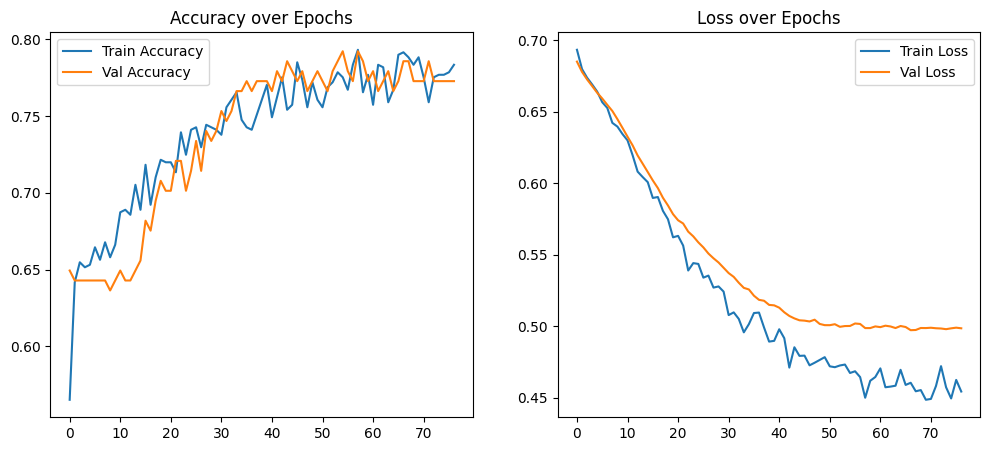

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Test Accuracy: 0.7857
Test Accuracy: 0.7857142857142857

Confusion Matrix:
 [[84 15]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        99
           1       0.71      0.67      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



In [ ]:

early_stop = EarlyStopping(
    monitor='val_loss',   # what to monitor (can be 'val_accuracy' too)
    patience=10,          # stop if no improvement for 10 epochs
    restore_best_weights=True  # keep the best weights (not the overfitted ones)
)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, min_lr=1e-6)

# Train
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=16, verbose=1,callbacks=[early_stop])
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=150,
                    batch_size=32,
                    callbacks=[early_stop, reduce_lr],
                    # class_weight=class_weights,   # comment out if you don't want to use
                    verbose=1)

# Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Evaluation
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


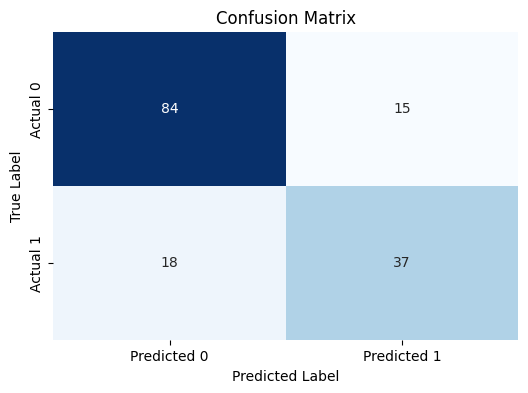

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)   # Convert probabilities to 0/1

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.82      0.85      0.84        99
    Diabetes       0.71      0.67      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154

